In [1]:
# Import the libraries

import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import json 
import matplotlib.pyplot as plt
import datetime
plt.style.use('fivethirtyeight')

# Data Processing Functions

In [30]:
# Function for cleaning the text
def cleanTxt(text):
    text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
    text = re.sub('#', '', text) # Removing '#' hash tag
    text = re.sub('RT[\s]+', '', text) # Removing RT
    text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
    return text

# Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
    return  TextBlob(text).sentiment.polarity

# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score): # Polarity goes as a score here
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

# Setting Up Twitter Connection

In [32]:
top_20 = pd.read_csv('Top 20.csv')
top_20 = top_20[:20]
top_20.head()

,Id,Name,Screen Name,Location,Followers Count,Friends Count,Listed Count,Created At,Favourites Count,Verified,Tweets Count,Tweet Count,Average Likes,Average comments,Average retweets,Influence Matrix
0,9.640000e+17,Mrs. Krassenstein,HKrassenstein,"Fort Myers, FL",193660,5333,696,2/14/2018 15:03,8193,False,12724,567,15130.511460,673.735450,1485.613757,0.193184
1,8.220000e+17,The White House,WhiteHouse,"Washington, D.C.",25864844,14,18148,1/19/2017 22:54,20,True,23641,478,12244.142260,1847.035565,3425.449791,0.266669
2,1.113425e+07,GOP,GOP,NaN,2706710,1650,11202,12/13/2007 17:15,264,True,44452,462,4947.019481,1140.647186,1453.670996,0.258233
3,2.353606e+09,Ronna McDaniel,GOPChairwoman,NaN,1018735,2580,3617,2/20/2014 18:05,8540,True,16815,322,9220.341615,1270.540373,2974.801242,0.212354
4,2.105926e+07,Ted Lieu,tedlieu,California,1501775,10224,7460,2/17/2009 3:12,76096,True,27541,242,13269.834710,586.619835,4103.318182,0.184236


In [33]:
data = pd.read_csv("Combined Information.csv")
data = data[data['Screen Name'].isin(list(top_20['Screen Name']))]
print(data.shape)
data.head()

(3604, 19)


,index,Screen Name,Date,Tweet,Likes,Comments,Retweets,Mentions,Clean Text,Id,Name,Location,Followers Count,Friends Count,Listed Count,Created At,Favourites Count,Verified,Tweets Count
0,0,donwinslow,27-Nov,Dear @realDonaldTrump President-elect Biden's...,15800,173,2300,@realDonaldTrump,dear president elect national popular vote lea...,255812611.0,Don Winslow,Repped by The Story Factory,540001,18502,2579,2/22/2011 2:58,168471,True,59151
1,81,donwinslow,27-Nov,Dear @realDonaldTrump This is incredibly s...,16300,325,1900,@realDonaldTrump,dear incredibly simple lost,255812611.0,Don Winslow,Repped by The Story Factory,540001,18502,2579,2/22/2011 2:58,168471,True,59151
2,94,donwinslow,26-Nov,Dear @realDonaldTrump It's going to be a ve...,9600,172,935,@realDonaldTrump,dear going different,255812611.0,Don Winslow,Repped by The Story Factory,540001,18502,2579,2/22/2011 2:58,168471,True,59151
3,151,donwinslow,26-Nov,I'm thankful to all the people who didn't trav...,62100,813,4300,NaN,thankful people travel thanksgiving thankful t...,255812611.0,Don Winslow,Repped by The Story Factory,540001,18502,2579,2/22/2011 2:58,168471,True,59151
4,234,donwinslow,25-Nov,What James Comey said about Michael Flynn was ...,9500,213,1500,NaN,said true told trump true broke law trump brok...,255812611.0,Don Winslow,Repped by The Story Factory,540001,18502,2579,2/22/2011 2:58,168471,True,59151


In [34]:
data.dropna(subset=['Clean Text'],inplace=True)
data.shape

(3601, 19)

In [35]:
data.to_csv("Tweets for top 20 influencers.csv", index=False)

HKrassenstein


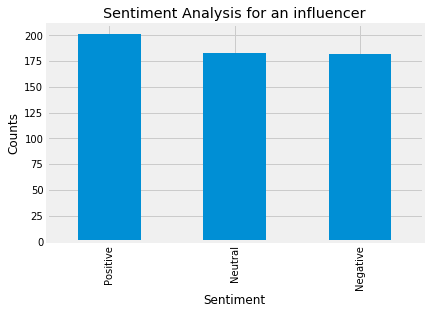

WhiteHouse


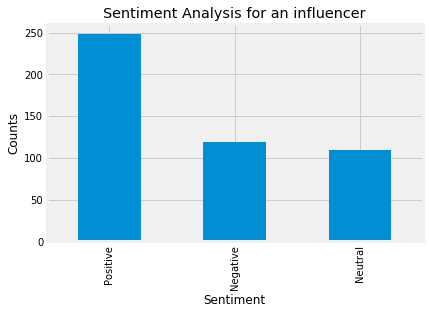

GOP


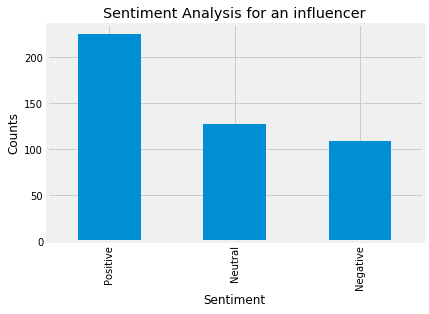

GOPChairwoman


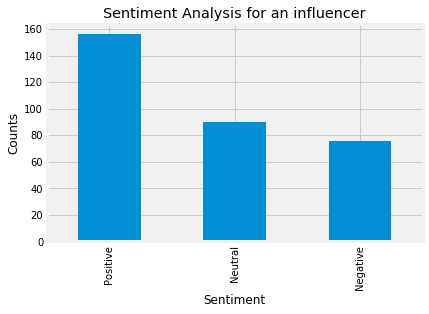

tedlieu


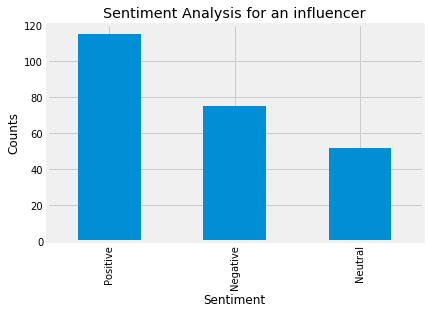

donwinslow


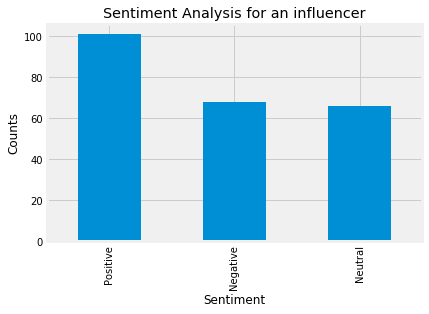

TeamTrump


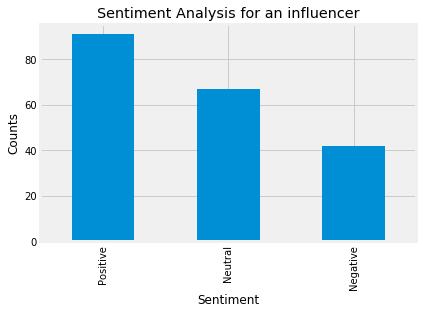

JoeBiden


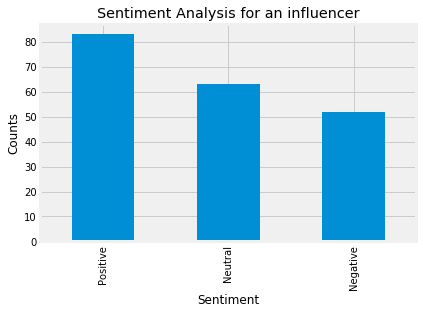

Mike_Pence


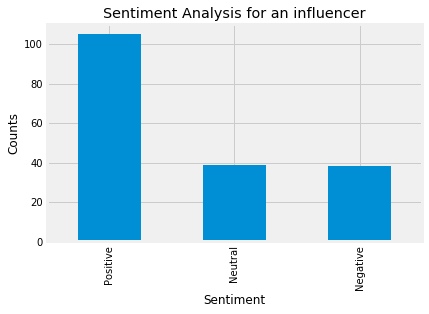

ScottPresler


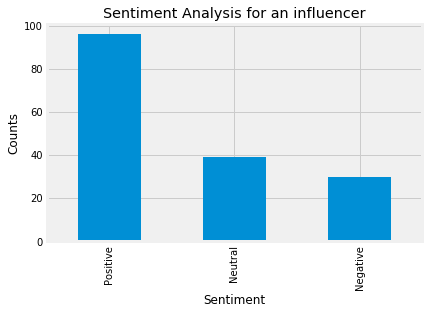

kayleighmcenany


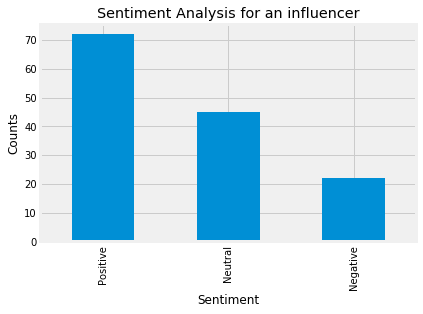

CNN


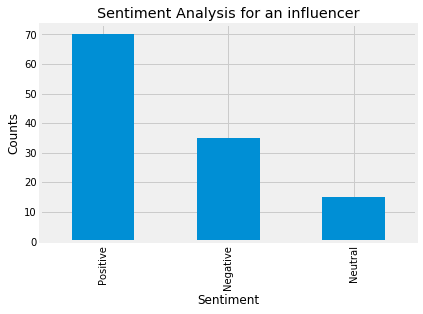

TomFitton


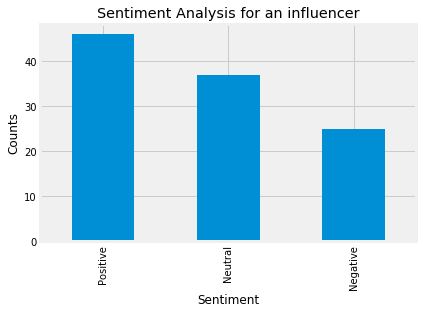

DonaldJTrumpJr


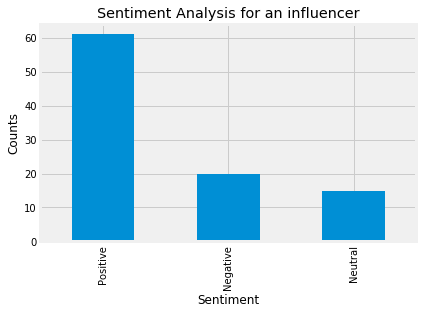

PressSec


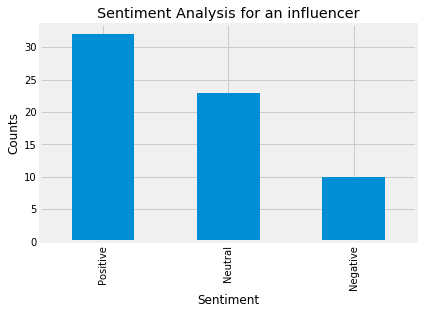

NikkiHaley


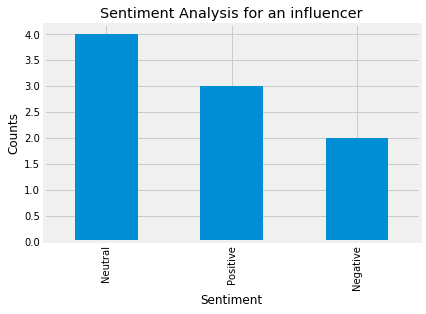

HillaryClinton


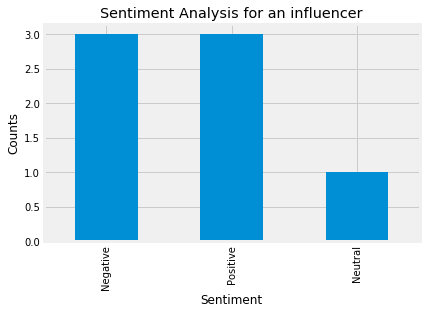

chicagosmayor


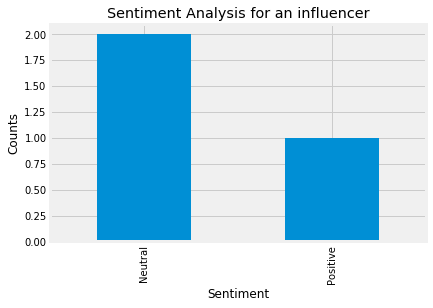

AOC


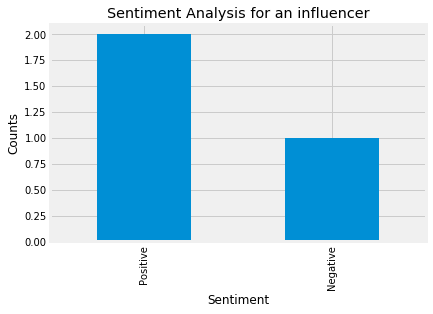

JimGaffigan


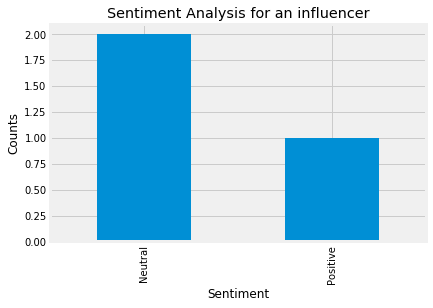

In [36]:
final_df = pd.DataFrame(columns=['Clean Text','Subjectivity','Polarity','Analysis'])

for auth in list(top_20['Screen Name']):
    print(auth)
    df = pd.DataFrame(data[data['Screen Name'] == auth]['Clean Text'], columns=['Clean Text'])
    #df['text'] = df['Clean Text'].apply(cleanTxt)
    df['Subjectivity'] = df['Clean Text'].apply(getSubjectivity)
    df['Polarity'] = df['Clean Text'].apply(getPolarity)
    df['Analysis'] = df['Polarity'].apply(getAnalysis)
    final_df = final_df.append(df)
    
    plt.title('Sentiment Analysis for an influencer')
    plt.xlabel('Sentiment')
    plt.ylabel('Counts')
    df['Analysis'].value_counts().plot(kind = 'bar')
    plt.show()
    #break

In [37]:
final_df.shape

(3601, 4)

In [38]:
final_df.to_csv("Sentiment Analysis.csv",index=False)

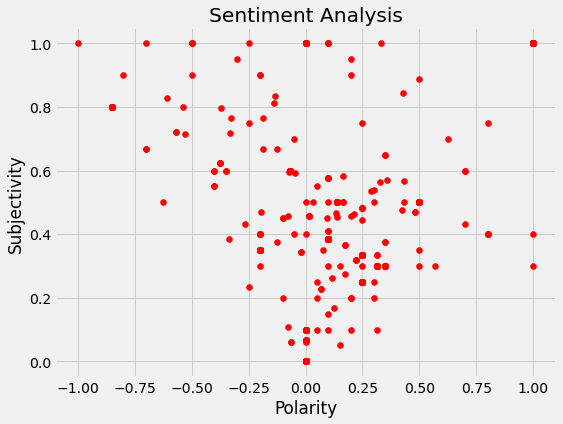

In [14]:
# Plotting polarity and subjectivity

plt.figure(figsize=(8,6)) 
plt.scatter(df1["Polarity"], df1["Subjectivity"], color='Red') 
plt.title('Sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show()